In [107]:
import pandas as pd
import random
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [100]:
# read original dataset
alldata_df = pd.read_csv('all_data.csv')
alldata_df = alldata_df[['Genre','Reading ONLY']]
groups = alldata_df.groupby('Genre').count().reset_index().rename(columns={'Reading ONLY':'number_of_values'})

alldata_df


,Genre,Reading ONLY
0,Control/No Music,0.7619
1,Control/No Music,0.7143
2,Control/No Music,0.7143
3,Control/No Music,0.9048
4,Western_Classical,0.7143
5,Western_Classical,0.7143
6,Western_Classical,0.9524
7,Western_Classical,0.6190
8,Pop,0.8095
9,Pop,0.6190


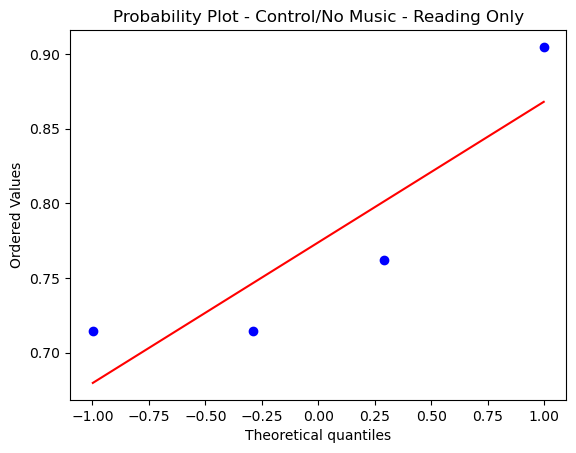

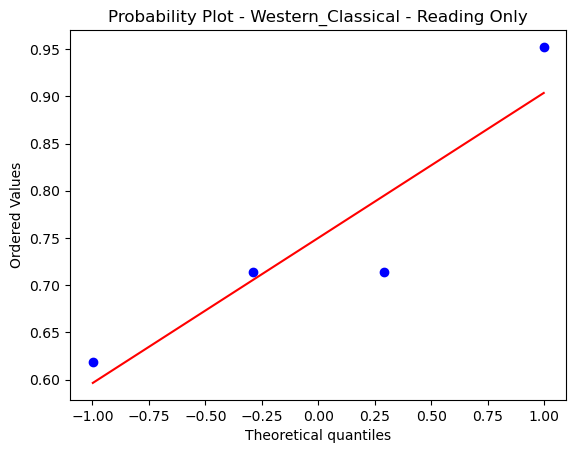

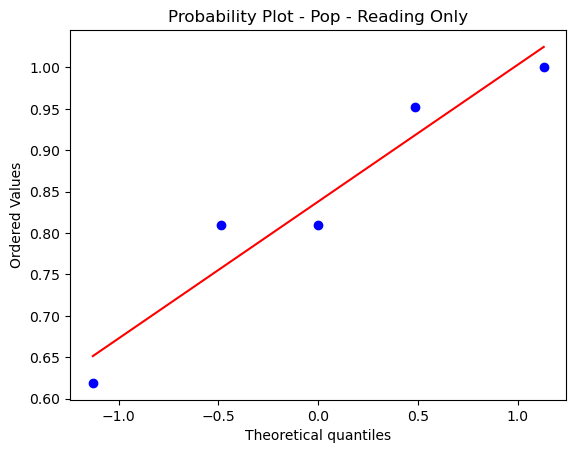

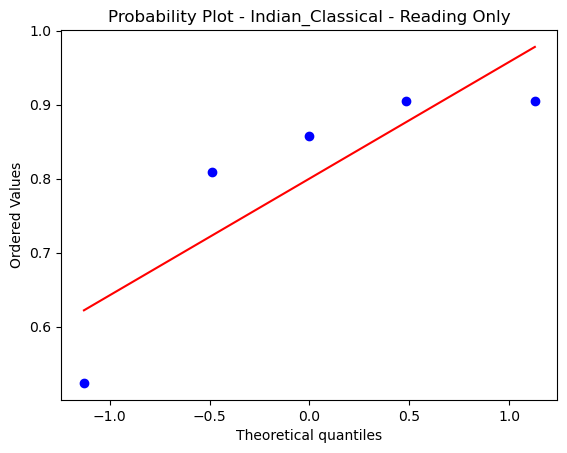

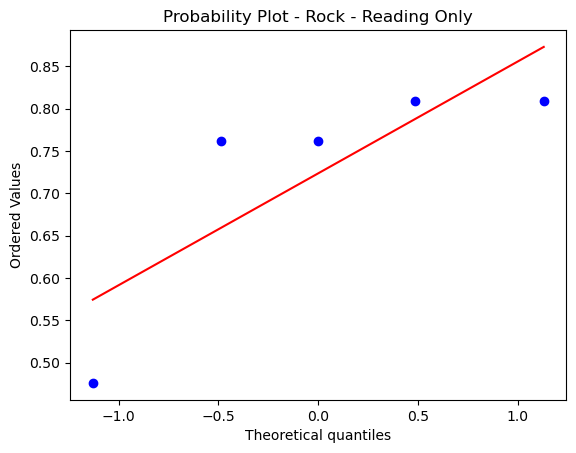

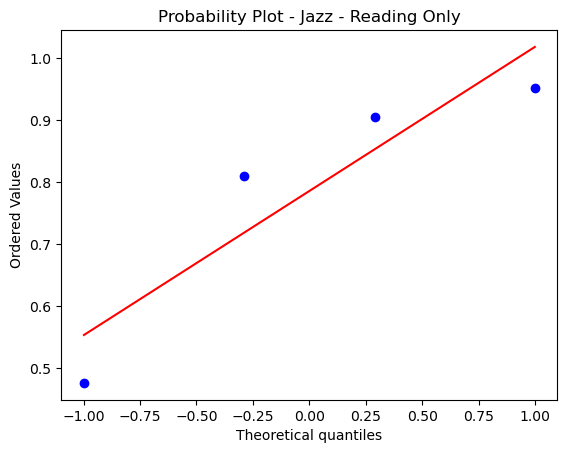

In [115]:
#Normality Check using plots
Genrelist = alldata_df['Genre'].unique()
for Genre in Genrelist:
    stats.probplot(alldata_df[alldata_df['Genre'] == Genre]['Reading ONLY'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  Genre + " - Reading Only")
    plt.show()

In [116]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = alldata_df.groupby('Genre').std().max() / alldata_df.groupby('Genre').std().min()
ratio



print('''Homogeneity of Variance Test: 
Ratio of max standard deviation to 
min standard deviation for''', 
      ratio)

Homogeneity of Variance Test: 
Ratio of max standard deviation to 
min standard deviation for Reading ONLY    2.381849
dtype: float64


In [103]:
x = '''
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table
'''
x = x.replace("major","Genre").replace("salary","Reading ONLY").replace("sample_df","alldata_df")
print(x)


# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = alldata_df['Reading ONLY'].mean()
SSTR = alldata_df.groupby('Genre').count() * (alldata_df.groupby('Genre').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Reading ONLY'].sum()

# calculate SSE and update anova table
SSE = (alldata_df.groupby('Genre').count() - 1) * alldata_df.groupby('Genre').std()**2
anova_table['SS']['Within Groups'] = SSE['Reading ONLY'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Reading ONLY'].sum() + SSE['Reading ONLY'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = alldata_df['Genre'].nunique() 

In [112]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Reading Comprehension Scores: Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Reading Comprehension Scores: Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = alldata_df['Reading ONLY'].mean()
SSTR = alldata_df.groupby('Genre').count() * (alldata_df.groupby('Genre').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Reading ONLY'].sum()

# calculate SSE and update anova table
SSE = (alldata_df.groupby('Genre').count() - 1) * alldata_df.groupby('Genre').std()**2
anova_table['SS']['Within Groups'] = SSE['Reading ONLY'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Reading ONLY'].sum() + SSE['Reading ONLY'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = alldata_df['Genre'].nunique() - 1
anova_table['df']['Within Groups'] = alldata_df.shape[0] - alldata_df['Genre'].nunique()
anova_table['df']['Total'] = alldata_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Reading Comprehension Scores: Source of Variation,,,,,,
Between Groups,0.038537,5,0.007707,0.328432,0.890106,2.684781
Within Groups,0.492807,21,0.023467,,,
Total,0.531344,26,0.020436,,,


In [105]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("p-value cutoff: 0.05")
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
p-value cutoff: 0.05
F-score is: 0.3284318090167565  and p value is: 0.890105585282498
Failed to reject the null hypothesis.


In [111]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=alldata_df['Reading ONLY'], groups=alldata_df['Genre'], alpha=0.05)
print('''                        For Reading Comprehension Scores: 
''', m_comp)

                        For Reading Comprehension Scores: 
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2      meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------
Control/No Music  Indian_Classical   0.0262 0.9998 -0.2953 0.3477  False
Control/No Music              Jazz   0.0119    1.0  -0.327 0.3508  False
Control/No Music               Pop   0.0643 0.9878 -0.2572 0.3857  False
Control/No Music              Rock    -0.05 0.9961 -0.3715 0.2715  False
Control/No Music Western_Classical  -0.0238 0.9999 -0.3627 0.3151  False
Indian_Classical              Jazz  -0.0143    1.0 -0.3358 0.3072  False
Indian_Classical               Pop   0.0381 0.9986  -0.265 0.3412  False
Indian_Classical              Rock  -0.0762 0.9668 -0.3793 0.2269  False
Indian_Classical Western_Classical    -0.05 0.9962 -0.3715 0.2715  False
            Jazz               Pop   0.0524 0.9952 -0.2691 0.373

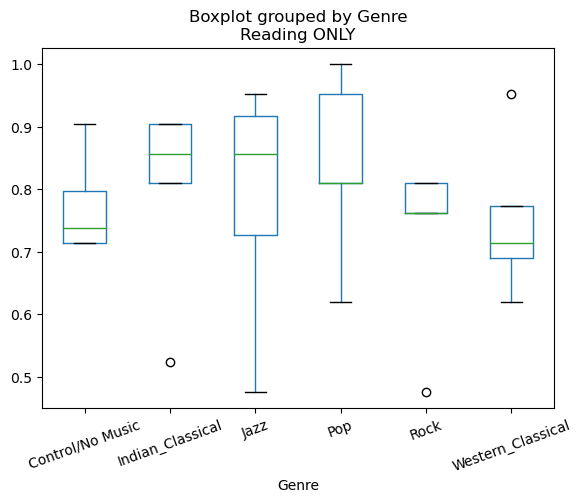

0.773825
0.785725


In [110]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_normal = df.copy()
    # apply the z-score method
    for column in df.columns:
        if column == "Reading ONLY":
            df_normal[column] = (df_normal[column] - df_normal[column].mean()) / df_normal[column].std()
        else: 
            pass
        
    return df_normal
    
#call the z_score function (NAURRRR)


def readdatacsv(filenamestring):
    df = pd.read_csv(filenamestring)
    a = df.columns[0]
    b = df.columns[2]
    df = df[[a,b]]
    return df

jazzdata_df = readdatacsv("jazz_data.csv")
controldata_df = readdatacsv("control_nm_data.csv")
icdata_df = readdatacsv("ic_data.csv")
wcdata_df = readdatacsv("wc_data.csv")
popdata_df = readdatacsv("pop_data.csv")
rockdata_df = readdatacsv("rock_data.csv")

mydict = {"Control/No Music":controldata_df, "Indian Classical":icdata_df, "Jazz":jazzdata_df, "Pop":popdata_df, "Rock":rockdata_df, "Western Classical":wcdata_df, "All Data":alldata_df}
#for key, value in mydict.items():
   # print("for genre: ", key)
    #display(value)


alldataplot = alldata_df.boxplot(by ='Genre', column =['Reading ONLY'], grid = False)
alldataplot.plot()
plt.xticks(rotation = 20) # Rotates X-Axis Ticks by 45-degrees
plt.show()

print(controldata_df["Reading ONLY"].mean())
print(jazzdata_df["Reading ONLY"].mean())

In [86]:
def myttest(treatmentdata, controldata, readingscore):
    print("Mean of treatment data: ", treatmentdata[readingscore].mean())
    print("Mean of control data: ", controldata[readingscore].mean())
    print("Variance of treatment data: ", treatmentdata[readingscore].var())
    print("Variance of control data: ", controldata[readingscore].var())
    testresults = ttest_ind(treatmentdata[readingscore], controldata[readingscore], equal_var=False)
    return testresults
#Last two lines tell function to remember what t test values are so that I can put htem in a variable later

In [87]:
#variable jazzttestresults captures stored value and printed sentences   
jazzttestresults = myttest(jazzdata_df, controldata_df, "Reading ONLY") 
print(jazzttestresults)

Mean of treatment data:  0.785725
Mean of control data:  0.773825
Variance of treatment data:  0.04611012916666667
Variance of control data:  0.0081277025
Ttest_indResult(statistic=0.10219409396171852, pvalue=0.9234908171491684)


In [88]:
wcttestresults = myttest(wcdata_df, controldata_df, "Reading ONLY")
print(wcttestresults)

Mean of treatment data:  0.75
Mean of control data:  0.773825
Variance of treatment data:  0.02022524666666667
Variance of control data:  0.0081277025
Ttest_indResult(statistic=-0.28298524081559107, pvalue=0.7883665704433988)


In [89]:
icttestresults = myttest(icdata_df, controldata_df, "Reading ONLY")
print(icttestresults)

Mean of treatment data:  0.8
Mean of control data:  0.773825
Variance of treatment data:  0.025400794999999997
Variance of control data:  0.0081277025
Ttest_indResult(statistic=0.31037607200522693, pvalue=0.7660447530213081)


In [90]:
popttestresults = myttest(popdata_df, controldata_df, "Reading ONLY")
print(popttestresults)

Mean of treatment data:  0.83808
Mean of control data:  0.773825
Variance of treatment data:  0.022229207
Variance of control data:  0.0081277025
Ttest_indResult(statistic=0.798351720788844, pvalue=0.4522610917190947)


In [91]:
rockttestresults = myttest(rockdata_df, controldata_df, "Reading ONLY")
print(rockttestresults)

Mean of treatment data:  0.7238
Mean of control data:  0.773825
Variance of treatment data:  0.01972449
Variance of control data:  0.0081277025
Ttest_indResult(statistic=-0.6470709120009027, pvalue=0.5388590968396823)


In [92]:
#NEEDS VALUES TO BE CHANGED!!!!!
data = [["Jazz vs Control", '0.10219409396171852', '0.9234908171491684' ],
        ["Rock vs Control", '-0.6470709120009027', '0.5388590968396823' ], 
        ["WC vs Control", '-0.28298524081559107', '0.7883665704433988' ], 
        ["IC vs Control", '0.31037607200522693', '0.7660447530213081' ], 
        ["Pop vs Control", '0.798351720788844', '0.4522610917190947' ]]
ttest_table = pd.DataFrame(data, columns = ["Reading Comprehension: Treatment Data to Control Data","t-statistic", "p-value"])
ttest_table.set_index('Reading Comprehension: Treatment Data to Control Data', inplace = True)
ttest_table

,t-statistic,p-value
Reading Comprehension: Treatment Data to Control Data,,
Jazz vs Control,0.10219409396171852,0.9234908171491684
Rock vs Control,-0.6470709120009027,0.5388590968396823
WC vs Control,-0.28298524081559107,0.7883665704433988
IC vs Control,0.31037607200522693,0.7660447530213081
Pop vs Control,0.798351720788844,0.4522610917190947


In [97]:
df_merged = pd.concat([jazzdata_df, controldata_df], ignore_index=True)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Jazz vs Control: Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Jazz vs Control: Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df_merged['Reading ONLY'].mean()
SSTR = df_merged.groupby('Genre').count() * (df_merged.groupby('Genre').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Reading ONLY'].sum()

# calculate SSE and update anova table
SSE = (df_merged.groupby('Genre').count() - 1) * df_merged.groupby('Genre').std()**2
anova_table['SS']['Within Groups'] = SSE['Reading ONLY'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Reading ONLY'].sum() + SSE['Reading ONLY'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df_merged['Genre'].nunique() - 1
anova_table['df']['Within Groups'] = df_merged.shape[0] - df_merged['Genre'].nunique()
anova_table['df']['Total'] = df_merged.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05

anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("p-value cutoff: 0.05")
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

,SS,df,MS,F,P-value,F crit
Jazz vs Control: Source of Variation,,,,,,
Between Groups,0.000283,1,0.000283,0.010444,0.921932,5.987378
Within Groups,0.162713,6,0.027119,,,
Total,0.162997,7,0.023285,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
p-value cutoff: 0.05
F-score is: 0.010443632840656553  and p value is: 0.921932423934469
Failed to reject the null hypothesis.


In [119]:
data = [['Control/No Music', '', '', '', '', '', '', '', ''], ['Indian Classical', '', '', '', '', '', '', '', ''], ['Jazz', '', '', '', '', '', '', '', ''], ['Pop', '', '', '', '', '', '', '', ''], ['Rock', '', '', '', '', '', '', '', ''],['Western Classical', '', '', '', '', '', '', '', ''], ['All Data', '', '', '', '', '', '', '', ''] ] 
desc_stats_table = pd.DataFrame(data, columns = ['Genre', 'Count','Mean', 'STD', 'Min','Q1','Median','Q3', 'Max']) 
desc_stats_table.set_index('Genre', inplace = True)

for key in mydict.keys():
#update count value for each genre
    genrecount = mydict[key]["Reading ONLY"].count()
    desc_stats_table["Count"][key] = genrecount    
#update mean in table
    genrecount = mydict[key]["Reading ONLY"].mean()
    desc_stats_table["Mean"][key] = genrecount
#update std
    genrecount = mydict[key]["Reading ONLY"].std()
    desc_stats_table["STD"][key] = genrecount
#update min
    genrecount = mydict[key]["Reading ONLY"].min()
    desc_stats_table["Min"][key] = genrecount
#Q1
    genrecount = mydict[key]["Reading ONLY"].quantile(q=0.25)
    desc_stats_table["Q1"][key] = genrecount
#Median
    genrecount = mydict[key]["Reading ONLY"].quantile(q=0.5)
    desc_stats_table["Median"][key] = genrecount
#Q3
    genrecount = mydict[key]["Reading ONLY"].quantile(q=0.75)
    desc_stats_table["Q3"][key] = genrecount
#max
    genrecount = mydict[key]["Reading ONLY"].max()
    desc_stats_table["Max"][key] = genrecount

    
print("Reading Scores Descriptive Stats")  
desc_stats_table

Reading Scores Descriptive Stats


,Count,Mean,STD,Min,Q1,Median,Q3,Max
Genre,,,,,,,,
Control/No Music,4,0.773825,0.090154,0.7143,0.7143,0.7381,0.797625,0.9048
Indian Classical,5,0.8,0.159376,0.5238,0.8095,0.8571,0.9048,0.9048
Jazz,4,0.785725,0.214733,0.4762,0.726175,0.85715,0.9167,0.9524
Pop,5,0.83808,0.149095,0.619,0.8095,0.8095,0.9524,1.0
Rock,5,0.7238,0.140444,0.4762,0.7619,0.7619,0.8095,0.8095
Western Classical,4,0.75,0.142215,0.619,0.690475,0.7143,0.773825,0.9524
All Data,27,0.779541,0.142956,0.4762,0.7143,0.8095,0.9048,1.0
